In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [46]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('../data/prepocessed_data.csv')

In [3]:
data.head(5)

,LLC_loads,page_faults,Input Size,cpu_migrations,LLC_load_misses,cache_references,cycles,instructions,bus_cycles,ref_cycles,LLC_store_misses_percent,minor_faults,cpu_clock,branch_misses,branches_instructions,time,user_time,sys_time
0,3586395,69534,0,7,67890,13221057,521324755,668243892,35970429,818766563,1.620721,69534,574.21,3953952,174052847,0.045,0.045,0.0
1,3756986,69530,0,14,83124,13201504,604087463,745514225,37409896,841124296,2.426791,69530,577.19,3571920,179328504,0.028,0.045,0.0
2,3291078,69493,0,9,25693,14204116,540727036,676803235,34805980,812634023,0.650713,69493,568.43,3778572,177831187,0.023,0.045,0.0
3,3594115,70120,0,12,79537,13690247,568738331,689568815,35174945,821102519,1.131704,70120,576.27,3799148,155514994,0.021,0.046,0.0
4,3211251,69519,0,7,54678,12650468,506534749,642433245,32651255,747611320,0.411899,69519,568.37,3605267,149658203,0.018,0.045,0.0


In [4]:
X = data.drop(['time','user_time','sys_time'], axis=1)
y = data[['time','user_time','sys_time']]

In [5]:
X.head(5)

,LLC_loads,page_faults,Input Size,cpu_migrations,LLC_load_misses,cache_references,cycles,instructions,bus_cycles,ref_cycles,LLC_store_misses_percent,minor_faults,cpu_clock,branch_misses,branches_instructions
0,3586395,69534,0,7,67890,13221057,521324755,668243892,35970429,818766563,1.620721,69534,574.21,3953952,174052847
1,3756986,69530,0,14,83124,13201504,604087463,745514225,37409896,841124296,2.426791,69530,577.19,3571920,179328504
2,3291078,69493,0,9,25693,14204116,540727036,676803235,34805980,812634023,0.650713,69493,568.43,3778572,177831187
3,3594115,70120,0,12,79537,13690247,568738331,689568815,35174945,821102519,1.131704,70120,576.27,3799148,155514994
4,3211251,69519,0,7,54678,12650468,506534749,642433245,32651255,747611320,0.411899,69519,568.37,3605267,149658203


In [6]:
y.head(5)

,time,user_time,sys_time
0,0.045,0.045,0.0
1,0.028,0.045,0.0
2,0.023,0.045,0.0
3,0.021,0.046,0.0
4,0.018,0.045,0.0


In [7]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

In [8]:
print("X_train_Size: " + str(X_train.shape))
print("y_train_Size: " + str(y_train.shape))
print("X_val_Size: " + str(X_val.shape))
print("y_val_Size: " + str(y_val.shape))
print("X_test: " + str(X_test.shape))
print("y_test_Size: " + str(y_test.shape))

X_train_Size: (8400, 15)
y_train_Size: (8400, 3)
X_val_Size: (1800, 15)
y_val_Size: (1800, 3)
X_test: (1800, 15)
y_test_Size: (1800, 3)


Linear Regression R-Squared on train data: 0.8476403860102314


Text(0.5, 1.0, 'R^2 = 0.848')

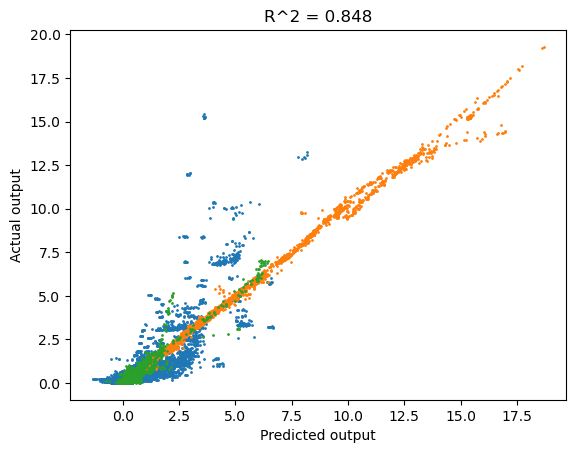

In [42]:
# Multiple Regression
# Sample data
# X = np.array([[1, 100], [2, 200], [3, 200], [4, 200], [5, 300]])  # input values
# y = np.array([100, 150, 200, 250, 200])  # output values

# Model
mul_model = LinearRegression().fit(X_train, y_train)
rSqr = mul_model.score(X_train,y_train)
b0, b1 = mul_model.intercept_, mul_model.coef_
print("Linear Regression R-Squared on train data: "+str(rSqr))
# yHat = b1[0]*X[:,0] + b1[1]*X[:,1] + b0
yHat = mul_model.predict(X_train)

# Scatter plot between predicted and actual score of training data:
plt.plot(yHat,y_train,'o',markersize=1)
plt.xlabel('Predicted output')
plt.ylabel('Actual output')
plt.title('R^2 = {:.3f}'.format(rSqr))

Linear Regression R-Squared:  0.8430498073041015
Random Forest Regression RMSE: 0.47349067839836717


Text(0.5, 1.0, 'R^2 = 0.848')

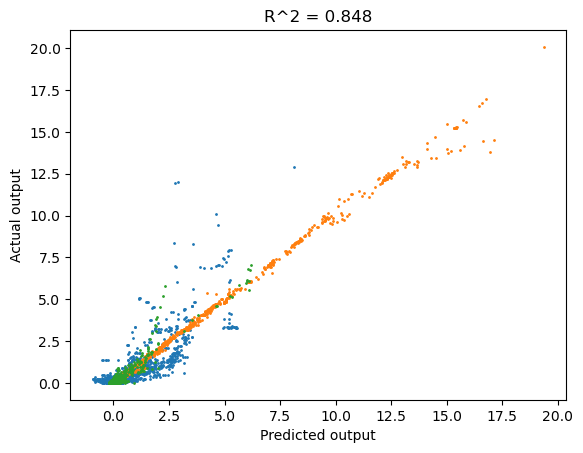

In [43]:
# Prediction
y_pred = mul_model.predict(X_test)
# print(y_pred)

# Evaluation
mul_rSqr = r2_score(y_test, y_pred)
print("Linear Regression R-Squared: ", mul_rSqr)
mul_mse = mean_squared_error(y_test, y_pred)
mul_rmse = np.sqrt(mul_mse)
print("Random Forest Regression RMSE:", mul_rmse)

# Scatter plot between predicted and actual score of test data:
plt.plot(y_pred,y_test,'o',markersize=1)
plt.xlabel('Predicted output')
plt.ylabel('Actual output')
plt.title('R^2 = {:.3f}'.format(rSqr))

In [48]:
# Random Forest Regression

# Model
rf_model = RandomForestRegressor(max_depth=2).fit(X_train, y_train) 
# maximum depth of the trees = 2 to prevent overfitting

# Prediction
y_pred = rf_model.predict(X_test)
# print(y_pred)

# Evaluation
rf_rSqr = r2_score(y_test, y_pred)
print("Random Forest Regression R-Squared: ", rf_rSqr)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
print("Random Forest Regression RMSE:", rf_rmse)

[[ 1.5418432   7.71331992  0.23519092]
 [ 0.19930676  0.49407763  0.04956418]
 [ 0.19930676  0.49407763  0.04956418]
 ...
 [ 0.19930676  0.49407763  0.04956418]
 [ 0.19930676  0.49407763  0.04956418]
 [ 4.19848579 12.07488749  1.14775624]]
Random Forest Regression R-Squared:  0.5630906289218599
Random Forest Regression RMSE: 0.7878661188646556


In [49]:
# LASSO Regression

# Scale the input
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the model
lasso_model = Lasso(alpha=0.1, max_iter=10000, tol=0.01).fit(X_train_scaled, y_train)
# alpha/the amount of regularization is 0.1; max #iterations is 10,000; tolerance level is 0.01 to improve convergence
lasso_coef = lasso_model.coef_

# Prediction
y_pred = lasso_model.predict(X_test_scaled)

# Evaluation
lasso_rSqr = r2_score(y_test, y_pred)
print("LASSO Regression R-Squared: ", lasso_rSqr)
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_rmse = np.sqrt(lasso_mse)
print("LASSO Regression RMSE:", lasso_rmse)

Random Forest Regression R-Squared:  0.7619473160727964
Random Forest Regression RMSE: 0.5501943538636741
